In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* phân bố đặt hàng của các thành phố

In [2]:

geo_data = pd.read_csv('dataset/olist_geolocation_dataset.csv')
print(geo_data.isnull().sum())
geo_data.head()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


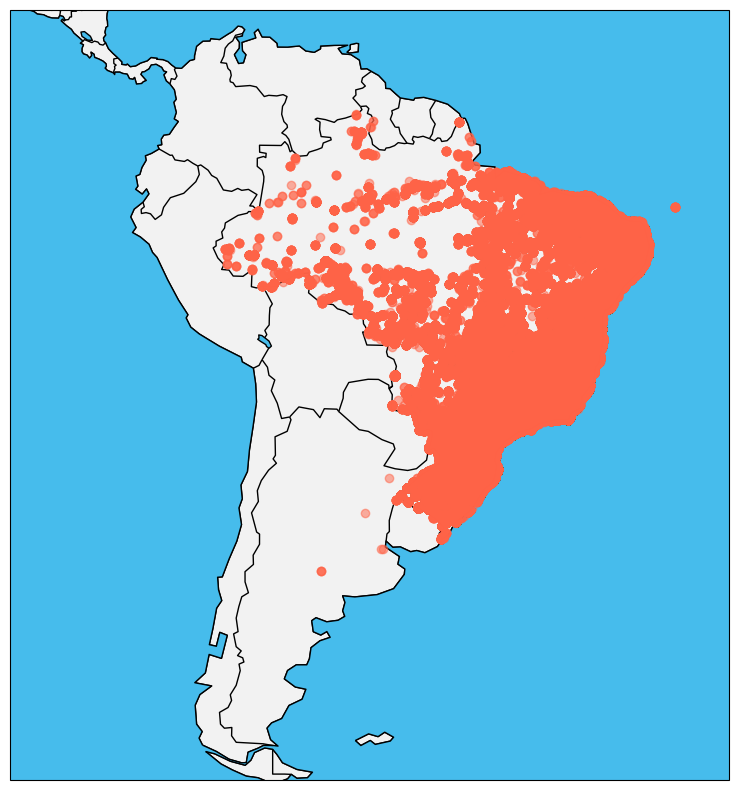

In [3]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

lat = geo_data['geolocation_lat']
lon = geo_data['geolocation_lng']

plt.figure(figsize=(10, 10))

# Tạo đối tượng bản đồ với hệ tọa độ PlateCarree
ax = plt.axes(projection=ccrs.PlateCarree())

# Vẽ bản đồ cơ bản
ax.set_extent([-92.269176, -27.581676, -55.401805, 13.884615], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='#f2f2f2')
ax.add_feature(cfeature.OCEAN, facecolor='#46bcec')
ax.add_feature(cfeature.LAKES, edgecolor='black', facecolor='#46bcec')

# Vẽ các điểm dữ liệu
ax.scatter(lon, lat, transform=ccrs.PlateCarree(), zorder=10, alpha=0.5, color='tomato')

plt.show()


Bản đồ trên hiển thị vị trí của các đơn đặt hàng sản phẩm đã mua và theo sự phân bổ dân cư, 
nó giải thích tỷ lệ mua sắm cao nhất ở bờ biển phía đông.
Tại sao bờ biển phía đông lại có tỉ lệ mua sắm cao nhất?
-Hầu hết dân số sống ở bờ biển phía đông và một phần nhỏ sống ở phía tây hơn. 

C:\Users\Admin\AppData\Local\Temp\ipykernel_13072\1414359806.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x ='geolocation_state', data=geo_data,


<Axes: xlabel='geolocation_state', ylabel='count'>

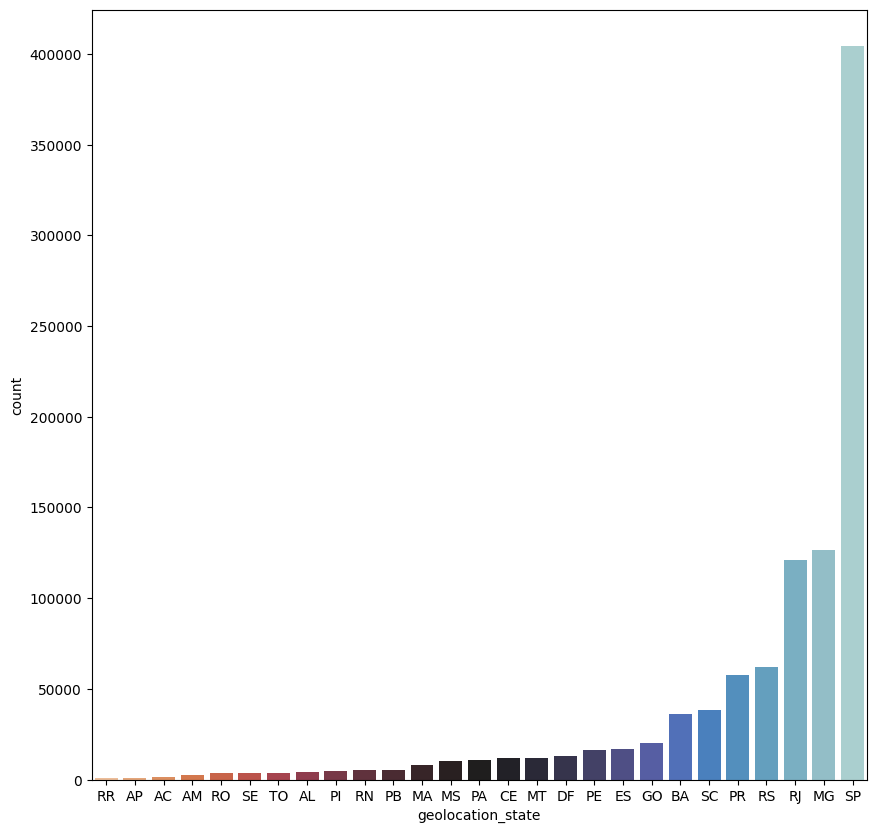

In [4]:
plt.figure(figsize=(10,10))
sns.countplot(x ='geolocation_state', data=geo_data, 
              order=geo_data['geolocation_state'].value_counts().sort_values().index, 
              palette='icefire_r')

São Paulo có tỷ lệ cao nhất và có khoảng cách rất lớn giữa các bang còn lại.
Tại sao São Paulo lại có tỉ lệ đặt rất cao và cao hơn hẳn các tiểu bang khác?
- dân số lớn.
- kinh tế phát triển hơn.
- có nhiều doanh nghiêp tập trung ở đó.
- là khu vực đô thị phát triển.
- mức thu nhập ở đây cao

* đơn hàng

In [5]:
order_data = pd.read_csv('dataset/olist_orders_dataset.csv')
order_data.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [6]:
order_data['order_purchase_timestamp'] = pd.to_datetime(order_data['order_purchase_timestamp'], format='%Y-%m-%d %H:%M:%S')
order_data['order_approved_at'] = pd.to_datetime(order_data['order_approved_at'], format='%Y-%m-%d %H:%M:%S')
order_data['order_delivered_customer_date'] = pd.to_datetime(order_data['order_delivered_customer_date'], format='%Y-%m-%d %H:%M:%S')
order_data['order_estimated_delivery_date'] = pd.to_datetime(order_data['order_estimated_delivery_date'], format='%Y-%m-%d %H:%M:%S')
order_data['order_delivered_carrier_date'] = pd.to_datetime(order_data['order_delivered_carrier_date'], format='%Y-%m-%d %H:%M:%S')
diff = (order_data['order_approved_at'] - order_data['order_purchase_timestamp']).median()
order_data['order_approved_at'].fillna(order_data['order_purchase_timestamp'] + diff,inplace=True)
diff = (order_data['order_delivered_carrier_date'] - order_data['order_approved_at']).median()
order_data['order_delivered_carrier_date'].fillna(order_data['order_approved_at'] + diff,inplace=True)
diff = (order_data['order_delivered_customer_date'] - order_data['order_delivered_carrier_date']).median()
order_data['order_delivered_customer_date'].fillna(order_data['order_delivered_carrier_date'] + diff,inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_13072\2125257246.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_data['order_approved_at'].fillna(order_data['order_purchase_timestamp'] + diff,inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13072\2125257246.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are

In [7]:
order_data['delivered_time'] = pd.to_datetime(order_data['order_delivered_customer_date'], format='%Y-%m-%d %H:%M:%S').dt.date
order_data['estimate_time'] = pd.to_datetime(order_data['order_estimated_delivery_date'], format='%Y-%m-%d %H:%M:%S').dt.date
order_data['hour']=pd.to_datetime(order_data['order_purchase_timestamp'], format='%Y-%m-%d %H:%M:%S').dt.hour

In [8]:
order_data['weekly'] = pd.to_datetime(order_data['order_delivered_customer_date'], format='%Y-%m-%d %H:%M:%S').dt.isocalendar().week
order_data['yearly']=pd.to_datetime(order_data['order_delivered_customer_date']).dt.to_period('M')
order_data['yearly']= order_data['yearly'].astype(str)
order_data['month']=pd.to_datetime(order_data['order_delivered_customer_date'], format='%Y-%m-%d %H:%M:%S').dt.month

In [9]:
order_data['diff_days'] = ( pd.to_datetime(order_data['estimate_time'])-pd.to_datetime(order_data['delivered_time'])).dt.days

In [10]:
order_data['delayed'] = np.where(order_data['order_delivered_customer_date']>order_data['order_estimated_delivery_date'],1,0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   weekly     99441 non-null  UInt32
 1   diff_days  99441 non-null  int64 
dtypes: UInt32(1), int64(1)
memory usage: 1.2 MB
None


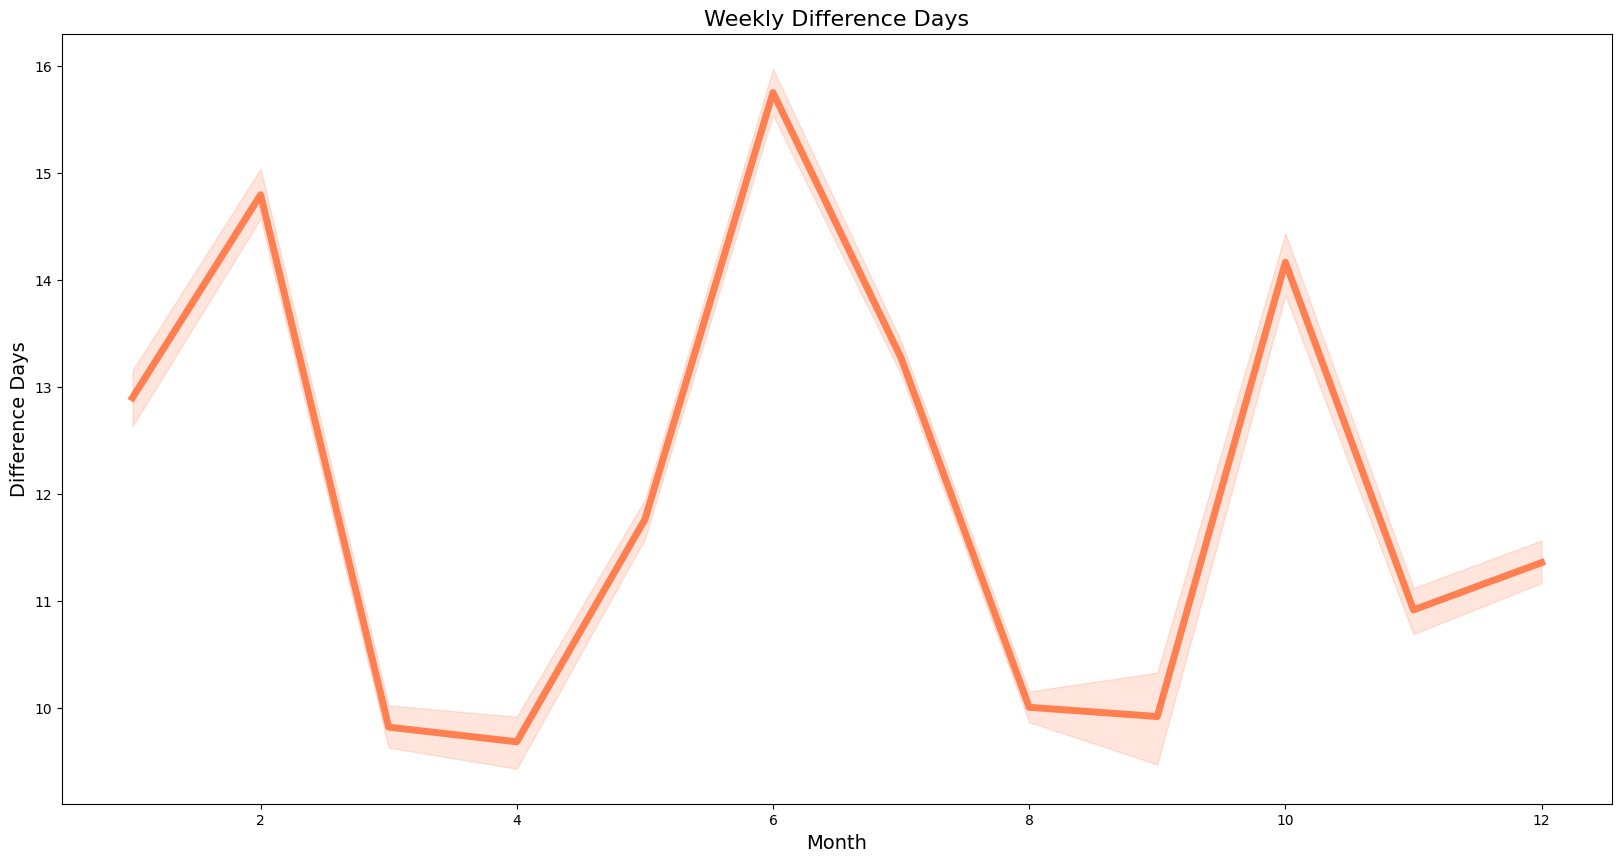

In [11]:
print(order_data[['weekly', 'diff_days']].info())

# Vẽ đồ thị với số lượng điểm dữ liệu nhỏ hơn hoặc không sử dụng các tham số phức tạp
plt.figure(figsize=(20, 10))
sns.lineplot(x='month', y='diff_days', data=order_data, color="coral", linewidth=5, markers=True, dashes=False)
plt.xlabel("Month", size=14)
plt.ylabel("Difference Days", size=14)
plt.title("Weekly Difference Days", size=16)
plt.show()

- tháng 6 có tỉ lệ giao hàng sớm hơn nhiều so với ngày dự kiến
- tháng 3-4 và 8-9 có tỉ lệ giao hàng sát với ngày dự kiến là rất nhiều
tại sao lại như vậy?
- có thể do tháng 6 có tỉ lệ đơn không cao bằng các tháng còn lại nên mới có thể giao sớm
- còn nhưng tháng 3,4,8,9 có tỉ lệ đơn nhiều nên giao hàng không được nhanh

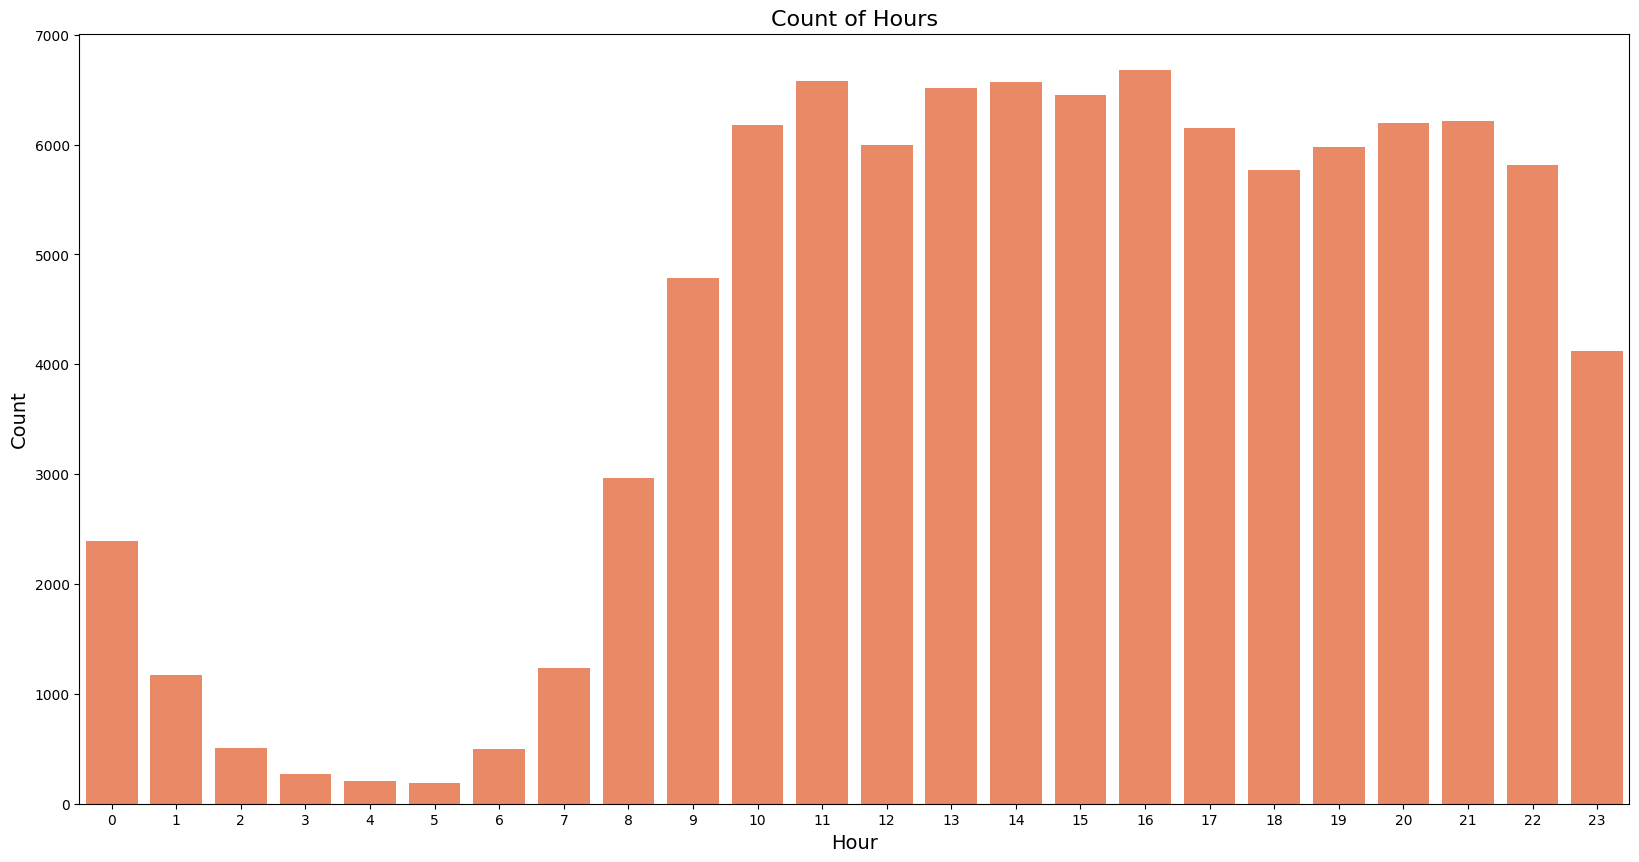

In [56]:
plt.figure(figsize=(20, 10))
sns.countplot(x='hour', data=order_data, color="coral")
plt.xlabel("Hour", size=14)
plt.ylabel("Count", size=14)
plt.title("Count of Hours", size=16)
plt.show()


- khoảng thời gian từ 11h đến 16h là khoảng thời gian có lượng đơn hàng là lớn nhất
- cty có thể đặt khung h quảng cáo vào h này để thúc đẩy doanh số bán hàng của cty

In [12]:
deplay=order_data['delayed'].value_counts()
print(deplay)

delayed
0    91477
1     7964
Name: count, dtype: int64


In [13]:
order_status_counts = order_data['order_status'].value_counts()
print(order_status_counts)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64


- delivered là trạng thái phổ biến nhất với 96,478 đơn hàng. Điều này cho thấy phần lớn các đơn hàng đã được giao thành công.

* top 10 product

In [14]:
order_item_data = pd.read_csv('dataset/olist_order_items_dataset.csv')
products_data = pd.read_csv('dataset/olist_products_dataset.csv')

In [15]:
products_data['product_category_name'].fillna('others', inplace = True)
products_data['product_weight_g'].fillna(products_data['product_weight_g'].mean(), inplace = True)
products_data['product_length_cm'].fillna(products_data['product_length_cm'].mean(), inplace = True)
products_data['product_height_cm'].fillna(products_data['product_height_cm'].mean(), inplace = True)
products_data['product_width_cm'].fillna(products_data['product_width_cm'].mean(), inplace = True)
products_data['product_name_lenght'].fillna(products_data['product_name_lenght'].mean(), inplace = True)
products_data['product_description_lenght'].fillna(products_data['product_description_lenght'].mean(), inplace = True)
products_data['product_photos_qty'].fillna(products_data['product_photos_qty'].mean(), inplace = True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_13072\4206799097.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_data['product_category_name'].fillna('others', inplace = True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13072\4206799097.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

In [16]:
#kết hợp 3 bảng
total_orders=pd.merge(order_data, order_item_data)
product_orders=pd.merge(total_orders,products_data, on="product_id")

In [17]:
#số sản phẩm 
len(product_orders['product_id'].unique())

32951

In [18]:
product_orders['product_id_shorten']=product_orders['product_id'].str[-8:]

C:\Users\Admin\AppData\Local\Temp\ipykernel_13072\3117782710.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='product_id_shorten', data=product_orders, palette='gist_earth',


Text(0.5, 1.0, 'Top 10 Products')

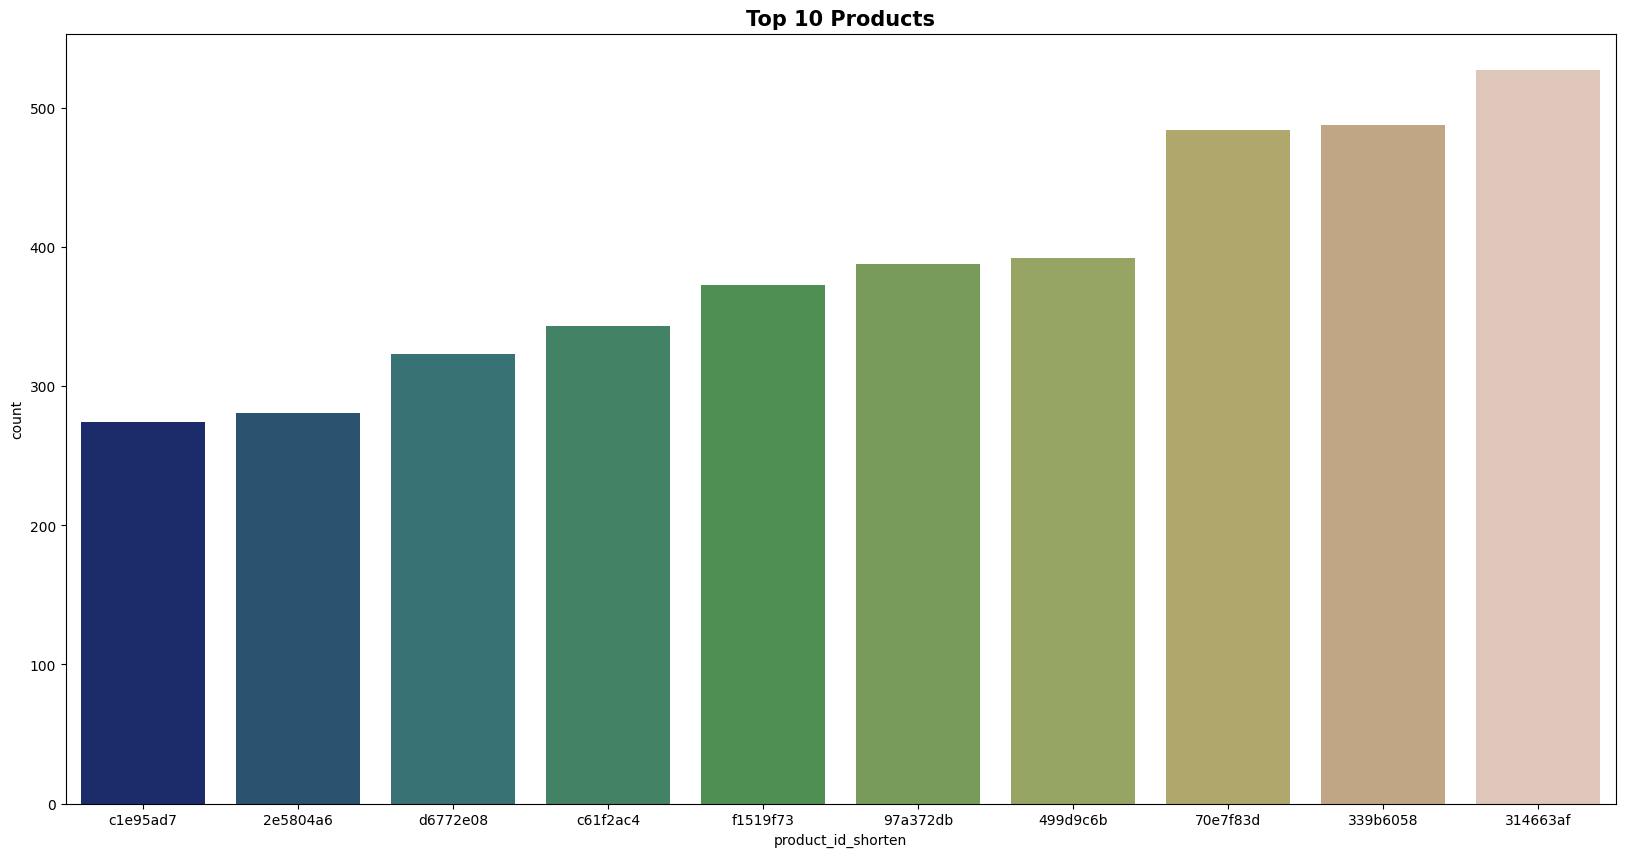

In [19]:
plt.figure(figsize=(20,10))
sns.countplot(x='product_id_shorten', data=product_orders, palette='gist_earth',
             order=product_orders['product_id_shorten'].value_counts()[:10]\
             .sort_values().index).set_title("Top 10 Products", fontsize=15,
                                             weight='bold')

top 10 sản phẩm có số lượng đơn đặt nhiều nhất

In [20]:
group_category= product_orders.groupby(['product_id_shorten','product_category_name',])['product_id_shorten']\
                                        .count().sort_values(ascending=False).head(10)
group_category

product_id_shorten  product_category_name 
314663af            moveis_decoracao          527
339b6058            cama_mesa_banho           488
70e7f83d            ferramentas_jardim        484
499d9c6b            ferramentas_jardim        392
97a372db            ferramentas_jardim        388
f1519f73            ferramentas_jardim        373
c61f2ac4            informatica_acessorios    343
d6772e08            relogios_presentes        323
2e5804a6            beleza_saude              281
c1e95ad7            informatica_acessorios    274
Name: product_id_shorten, dtype: int64

In [21]:
product_orders.groupby(["product_category_name"])["product_id_shorten"].count().sort_values(ascending=False).head(10)
#10 loại sản phẩm có tỉnh lệ đặt cao nhất

product_category_name
cama_mesa_banho           11115
beleza_saude               9670
esporte_lazer              8641
moveis_decoracao           8334
informatica_acessorios     7827
utilidades_domesticas      6964
relogios_presentes         5991
telefonia                  4545
ferramentas_jardim         4347
automotivo                 4235
Name: product_id_shorten, dtype: int64

* top 10 người bán hàng

In [22]:
sellers_data = pd.read_csv('dataset/olist_sellers_dataset.csv')
seller_products = pd.merge(product_orders, sellers_data, on="seller_id")
sellers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [23]:
seller_products['seller_id_shorten']=seller_products['seller_id'].str[-6:]

C:\Users\Admin\AppData\Local\Temp\ipykernel_13072\2860963463.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sellers.index, y=top_sellers.values, palette='tab20')


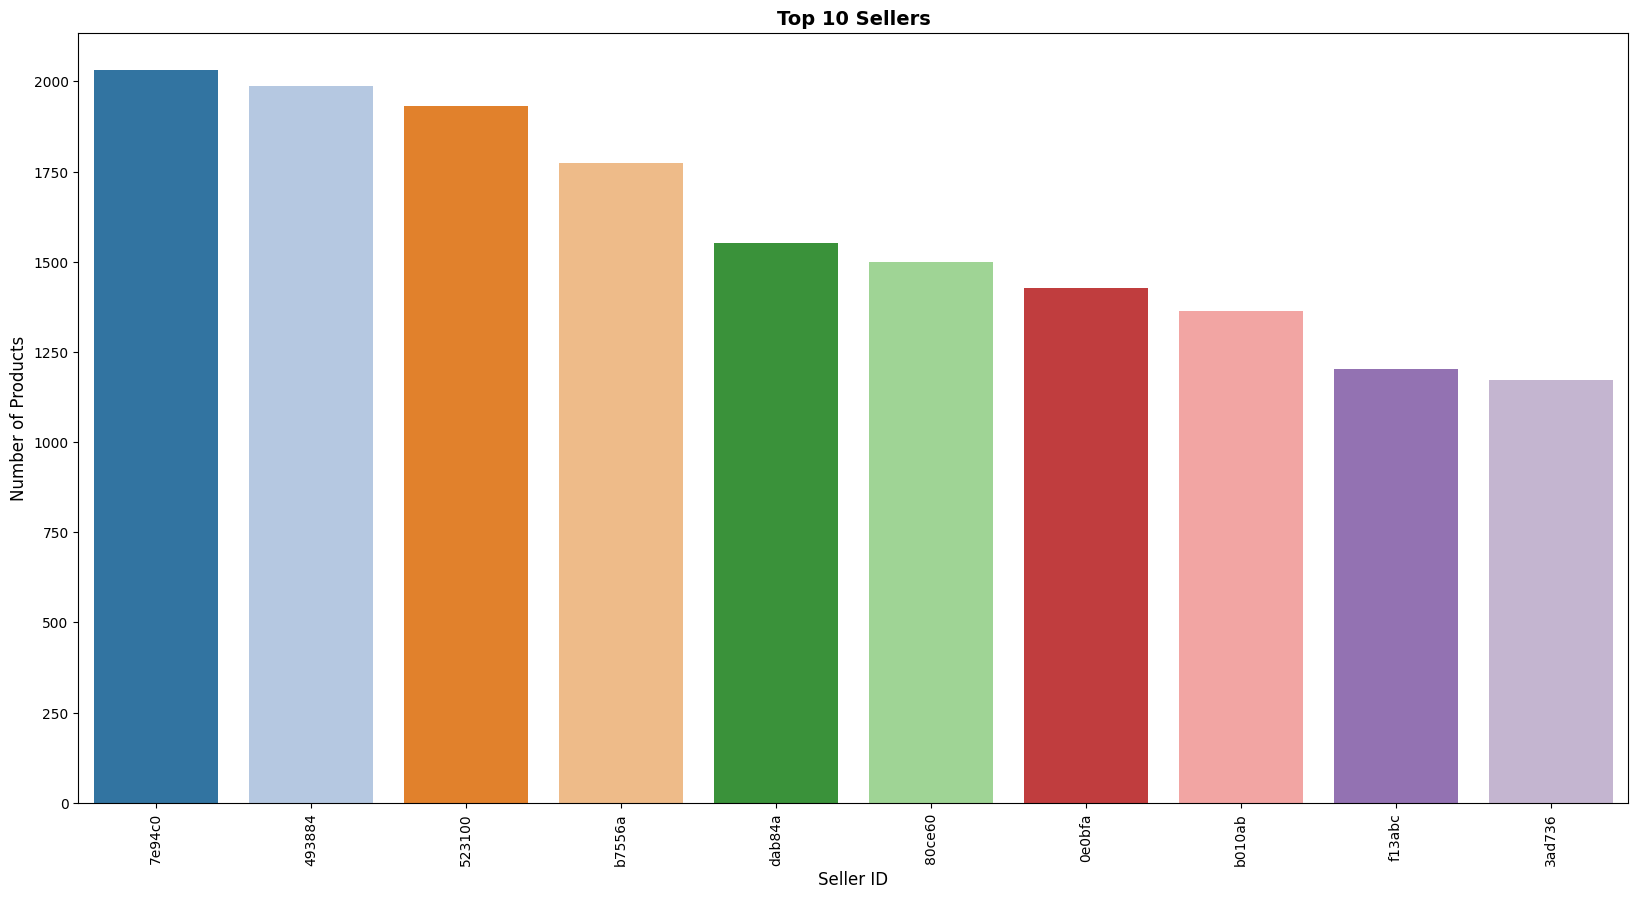

In [24]:
plt.figure(figsize=(20,10))
# Tạo DataFrame tạm thời để lưu số lượng sản phẩm cho 10 người bán hàng đầu
top_sellers = seller_products['seller_id_shorten'].value_counts()[:10]

# Vẽ biểu đồ cột
sns.barplot(x=top_sellers.index, y=top_sellers.values, palette='tab20')

# Thiết lập tiêu đề và nhãn trục
plt.title("Top 10 Sellers", size=14, weight='bold')
plt.xlabel("Seller ID", size=12)
plt.ylabel("Number of Products", size=12)

plt.xticks(rotation=90)  # Xoay nhãn trục x để dễ đọc hơn
plt.show()

In [25]:
seller_category= seller_products.groupby(['seller_id_shorten', 'product_category_name'])\
                        ['seller_id_shorten'].count().sort_values(ascending=False).head(10)
seller_category

seller_id_shorten  product_category_name
523100             ferramentas_jardim       1882
7e94c0             relogios_presentes       1628
493884             cama_mesa_banho          1572
0e0bfa             moveis_decoracao         1292
dab84a             cama_mesa_banho          1277
b010ab             moveis_escritorio        1233
f13abc             telefonia                1178
b7556a             beleza_saude             1091
3ad736             cool_stuff               1069
3b52b2             relogios_presentes       1002
Name: seller_id_shorten, dtype: int64

danh mục sản phẩm trong đơn đặt hàng của những người bán này 10 sản phẩm bán chạy nhất và vì họ có thể bán nhiều loại sản phẩm nên ferramentas_jardim là sản phẩm seller bán chạy nhất trong số sản phẩm bán chạy nhất.

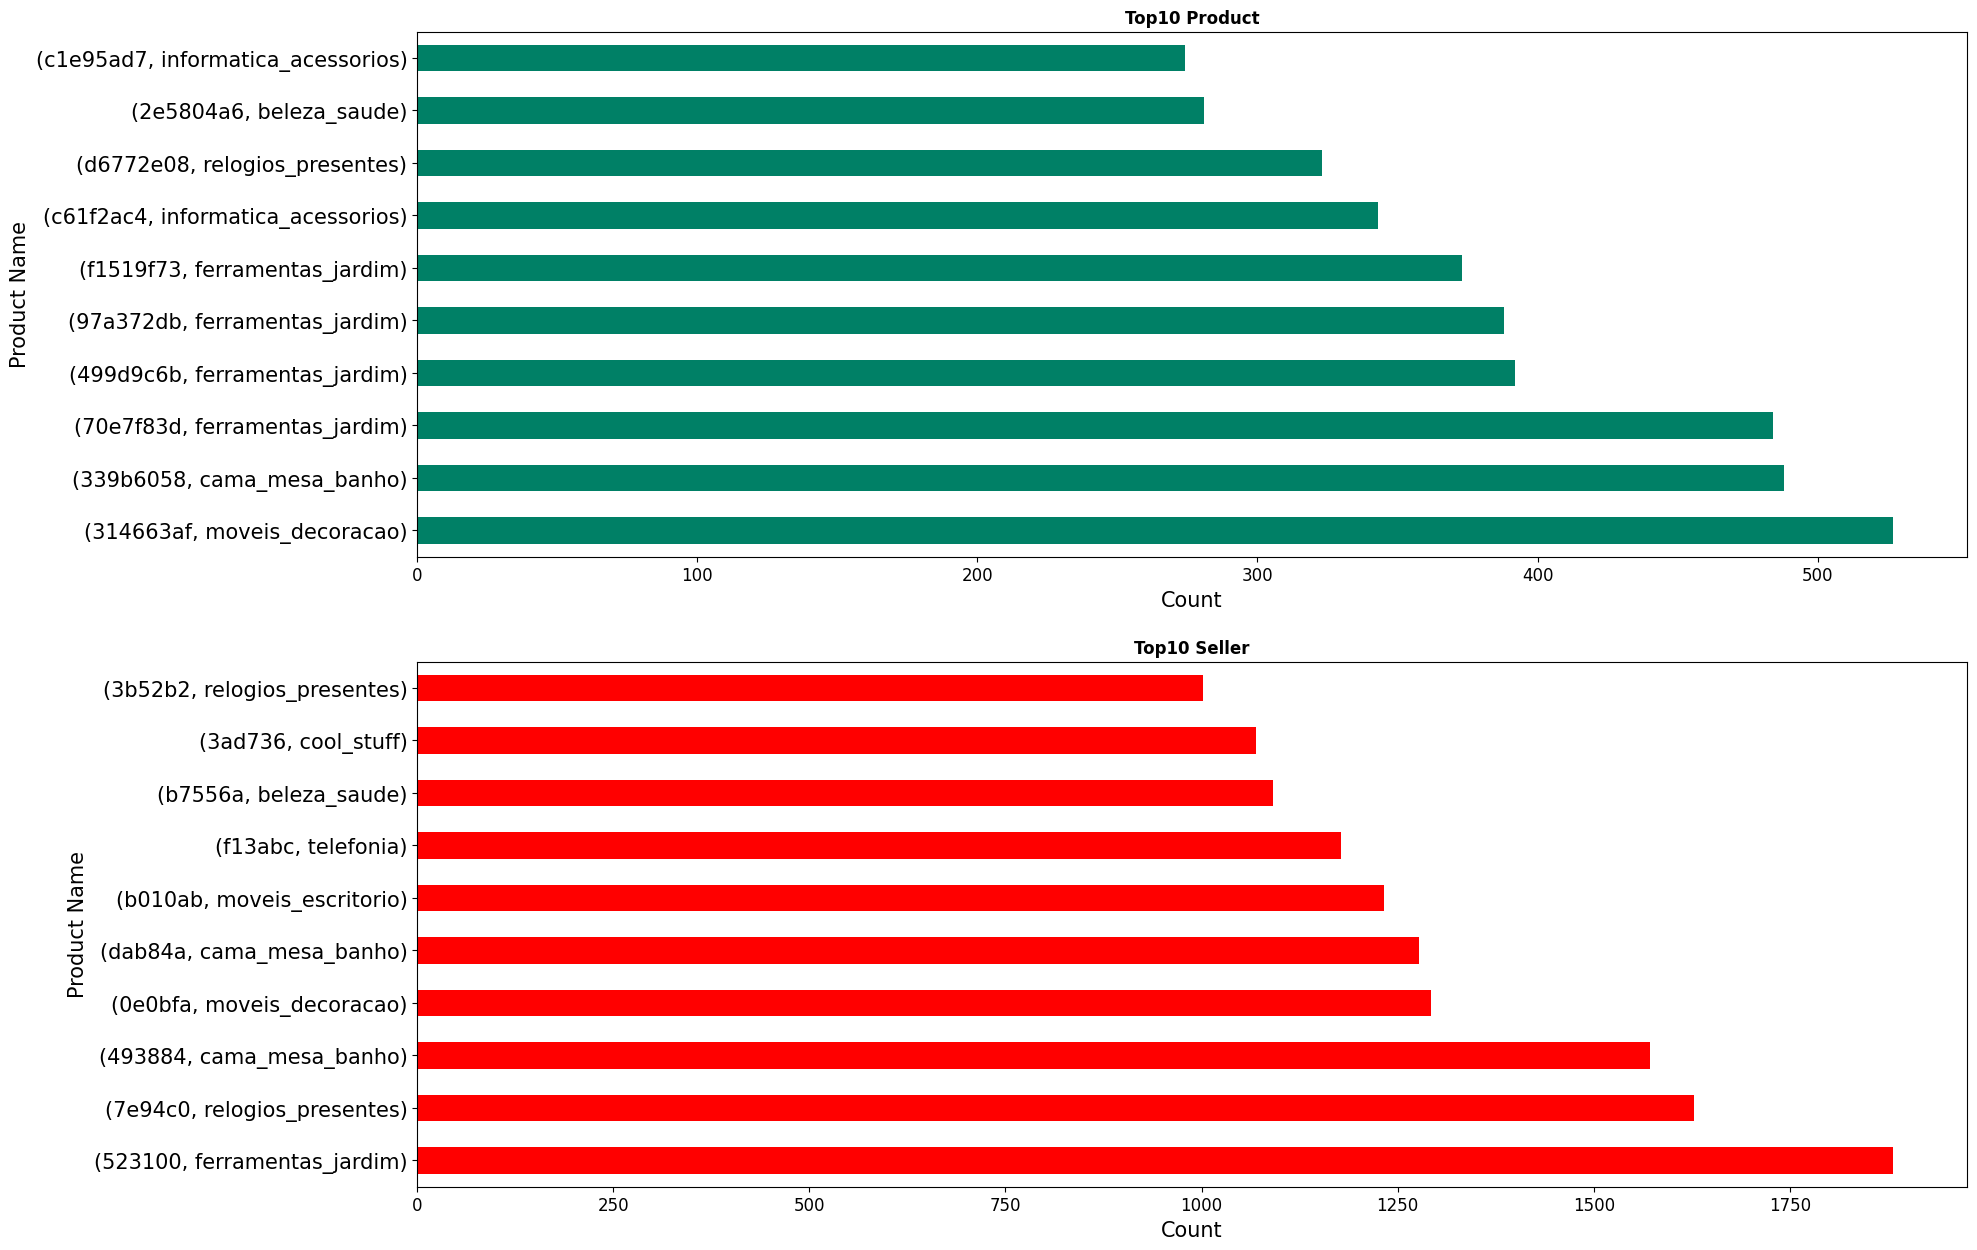

In [26]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,15))
group_category.plot.barh(ax=ax1, cmap='summer')
seller_category.plot.barh(ax=ax2, cmap='autumn')

ax1.set_title('Top10 Product', fontweight='bold')
ax2.set_title('Top10 Seller', fontweight='bold')

ax1.set_xlabel('Count', fontsize=15)
ax1.set_ylabel('Product Name', fontsize=15)
ax1.xaxis.set_tick_params(labelsize=12)
ax1.yaxis.set_tick_params(labelsize=15)

ax2.set_xlabel('Count', fontsize=15)
ax2.set_ylabel('Product Name', fontsize=15)
ax2.xaxis.set_tick_params(labelsize=12)
ax2.yaxis.set_tick_params(labelsize=15)

Biểu đồ trên hiển thị Số lượng sản phẩm thuộc các danh mục sản phẩm hàng đầu và Số lượng sản phẩm mà mỗi người bán (seller) đã bán. 
-  Mặt hàng bán nhiều nhất moveis_decoracao có mã id cuối là 314663af.
- Mặt hàng seller bán chạy nhất thuộc về ferramentas_jardim với người bán có mã là 523100 .


In [27]:
product_orders['order_month'] = pd.to_datetime(product_orders['order_purchase_timestamp'],
                                              format='%Y-%m-%d %H:%M:%S').dt.month


- số lượng mua hàng tuần của sản phẩm bán chạy nhất

C:\Users\Admin\AppData\Local\Temp\ipykernel_13072\2355431068.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='order_month', data=product_orders[product_orders['product_id_shorten'] == '314663af'],


Text(0.5, 1.0, 'Weekly Purchased Number of `314663af`')

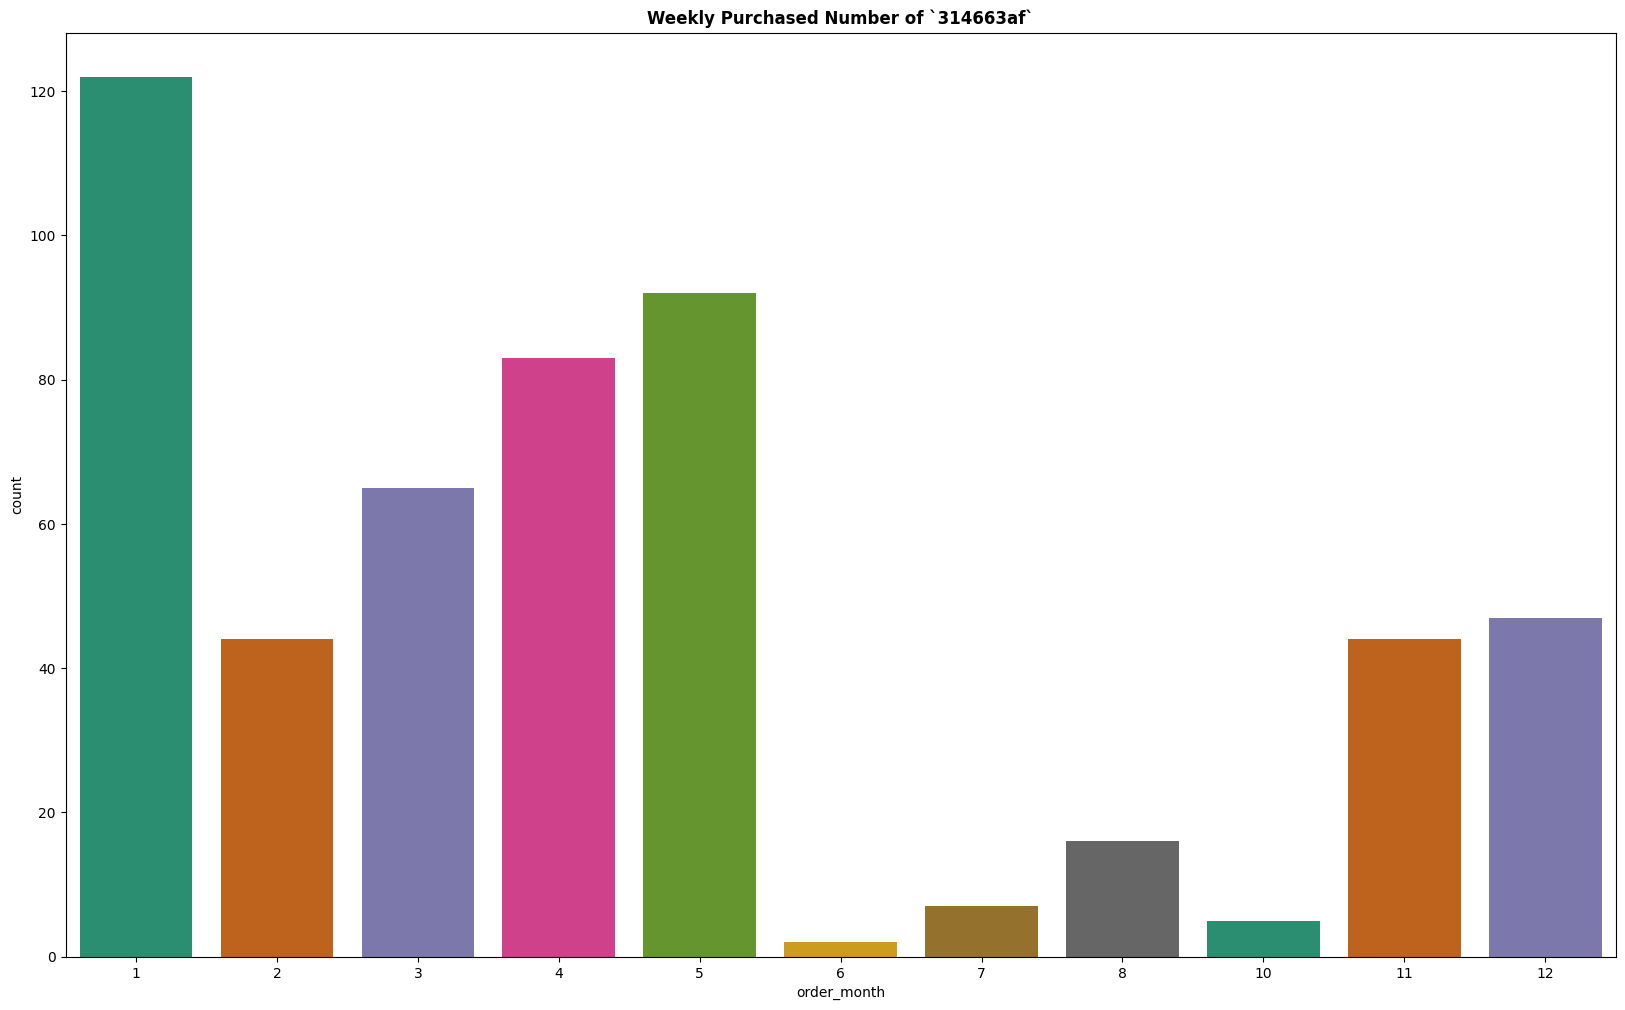

In [28]:
plt.figure(figsize=(20,12))
sns.countplot(x='order_month', data=product_orders[product_orders['product_id_shorten'] == '314663af'], 
              palette='Dark2', linewidth=5)\
    .set_title('Weekly Purchased Number of `314663af`', fontweight='bold')


- Tháng 1 là tháng có nhiều đơn hàng về sản phẩm có id là 314663af loại moveis_decoracao
- tháng ít mua nhất là tháng 6 vì tháng 6 là tháng có mật độ đơn ít nhất


In [29]:
#Nhóm dữ liệu và đếm số lượng sản phẩm theo tuần và danh mục sản phẩm
product_orders['order_week'] = pd.to_datetime(product_orders['order_purchase_timestamp'],
                                              format='%Y-%m-%d %H:%M:%S').dt.isocalendar().week
items_weekly =product_orders.groupby(['order_week','product_category_name'])\
                        ['product_category_name'].count().sort_values(ascending=False)
most_products= items_weekly.reset_index(name='count')
#Find the max value of row
max_selling_products= most_products[most_products['count'] 
                            == most_products.groupby(['order_week'])\
                            ['count'].transform(max)]
max_selling_products.head(10)


C:\Users\Admin\AppData\Local\Temp\ipykernel_13072\1784888955.py:10: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  ['count'].transform(max)]


,order_week,product_category_name,count
0,47,cama_mesa_banho,438
2,33,cama_mesa_banho,355
3,29,cama_mesa_banho,339
4,8,informatica_acessorios,330
5,32,beleza_saude,330
8,31,beleza_saude,320
9,9,informatica_acessorios,314
10,19,beleza_saude,310
11,18,beleza_saude,302
12,23,cama_mesa_banho,301


số lượng sản phẩm bán nhiều nhất tính theo tuần

In [30]:
max_selling_products['product_category_name'].value_counts()

product_category_name
cama_mesa_banho           33
beleza_saude              10
informatica_acessorios     3
esporte_lazer              3
moveis_decoracao           2
brinquedos                 1
Name: count, dtype: int64

cama_mesa_banho là loại đc bán chạy nhất và có 33 tuần là sản phẩm bán nhiều nhất tính theo tuần
- vì đây là loại sản phẩm nội thất hầu hết các nhà đều phải cần dùng

* payment

In [31]:
payment_data = pd.read_csv('dataset/olist_order_payments_dataset.csv')
payments=pd.merge(seller_products, payment_data, on="order_id")
payments.isnull().sum().sort_values()

order_id                         0
freight_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
price                            0
product_height_cm                0
product_id_shorten               0
seller_zip_code_prefix           0
seller_city                      0
seller_state                     0
seller_id_shorten                0
payment_sequential               0
payment_type                     0
product_width_cm                 0
payment_installments             0
shipping_limit_date              0
product_id                       0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
seller_id           

Text(0.5, 1.0, 'The Most Frequent Payment Type')

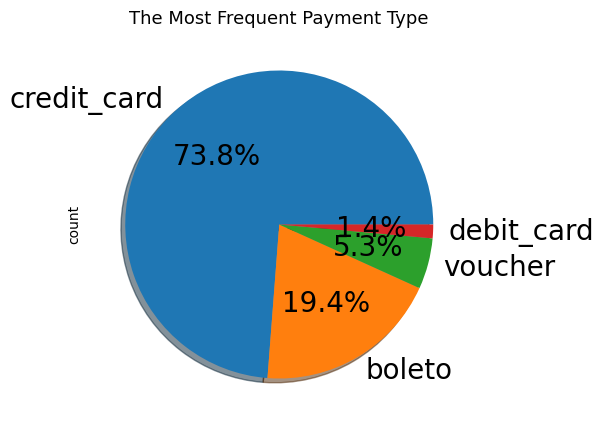

In [32]:
payments["payment_type"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    fontsize=20,
    figsize=(5,5),
    shadow=True
    
)
plt.title('The Most Frequent Payment Type'.title() , fontsize=13)

- hình thức thanh toán qua thẻ tin dụng được sử dụng nhiều nhất chiếm tới 73,8%

In [33]:
#First drop irrelevant columns that to make more handy to data
payments= payments.drop(columns=['product_name_lenght','product_description_lenght',
                                 'product_photos_qty','product_weight_g','product_length_cm',
                                 'product_height_cm','product_width_cm'])

In [34]:
price_details= payments.groupby(['order_id','price','product_category_name',
                                 'yearly','weekly'])[['freight_value','payment_value']].sum().reset_index()

In [35]:
#tổng giá trị đơn hàng có thể được tính bằng tổng giá và giá trị cước vận chuyển
price_details['total_order_value'] = price_details['price'] + price_details['freight_value']

In [36]:
price_details['gross_profit'] = price_details['payment_value']- price_details['total_order_value']
price_details['profit_margin'] = price_details['gross_profit']/price_details['payment_value']
price_details['profit_margin'] = price_details['profit_margin'].astype('int64')

In [37]:
price_details.sort_values('gross_profit', ascending=False).head(10)

,order_id,price,product_category_name,yearly,weekly,freight_value,payment_value,total_order_value,gross_profit,profit_margin
1489,03caa2c082116e1d31e67e9ae3700499,1680.00,telefonia_fixa,2017-10,42,224.08,109312.64,1904.08,107408.56,0
67476,ab14fdcfbe524636d65ee38360e22ce8,98.70,automotivo,2017-09,35,288.80,45256.00,387.50,44868.50,0
10715,1b15974a0141d54e36626dca3fdc731a,100.00,informatica_acessorios,2018-03,10,202.40,44048.00,302.40,43745.60,0
17522,2cc9089445046817a7539d90805e6e5a,989.10,agro_industria_e_comercio,2017-12,50,146.94,36489.24,1136.04,35353.20,0
92260,e8fa22c3673b1dd17ea315021b1f0f61,284.99,bebidas,2018-05,18,168.70,30186.00,453.69,29732.31,0
45643,736e1922ae60d0d6a89247b851902527,1790.00,telefonia_fixa,2018-07,30,114.88,29099.52,1904.88,27194.64,0
26232,428a2f660dc84138d969ccd69a0ab6d5,65.49,moveis_decoracao,2017-12,50,243.30,18384.75,308.79,18075.96,0
22939,3a213fcdfe7d98be74ea0dc05a8b31ae,108.00,relogios_presentes,2018-01,4,186.24,17786.88,294.24,17492.64,0
98155,f80549a97eb203e1566e026ab66f045b,137.90,informatica_acessorios,2017-09,39,388.10,17671.00,526.00,17145.00,0
26842,4412d97cb2093633afa85f11db46316c,120.00,informatica_acessorios,2018-06,23,83.99,15978.65,203.99,15774.66,0


In [38]:
reviews_data=pd.read_csv('dataset/olist_order_reviews_dataset.csv')
reviews_data.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

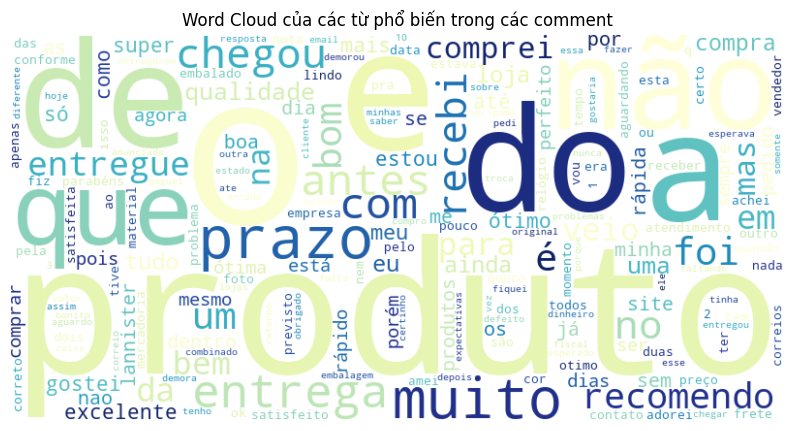

In [39]:
from wordcloud import WordCloud
import re
from collections import Counter

# Hàm tiền xử lý văn bản
def preprocess_text(text):
    text = text.lower()  # Chuyển tất cả chữ thành chữ thường
    text = re.sub(r'[^\w\s]', '', text)  # Loại bỏ dấu câu
    words = text.split()  # Tách từ
    return words

# Kết hợp tất cả các comment thành một danh sách các từ
all_words = []
for comment in reviews_data['review_comment_message'].dropna():
    all_words.extend(preprocess_text(comment))

# Đếm tần suất các từ
word_counts = Counter(all_words)

# Tạo word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='YlGnBu').generate_from_frequencies(word_counts)

# Vẽ word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Tắt trục
plt.title('Word Cloud của các từ phổ biến trong các comment')
plt.show()


In [40]:
review = reviews_data.drop('review_comment_message',axis=1)
def fill_title(row):
    if row['review_score'] >4:
        val = "Super recomended"
    elif row['review_score'] >3:
        val = "Recomended"
    elif row['review_score'] >2:
        val = "Average"
    elif row['review_score'] >1:
        val = "Not good"
    else:    
        val = 'Very Bad'
    return val

In [41]:
review['review_comment_title'] = review.apply(fill_title, axis=1)

<Axes: xlabel='review_score', ylabel='count'>

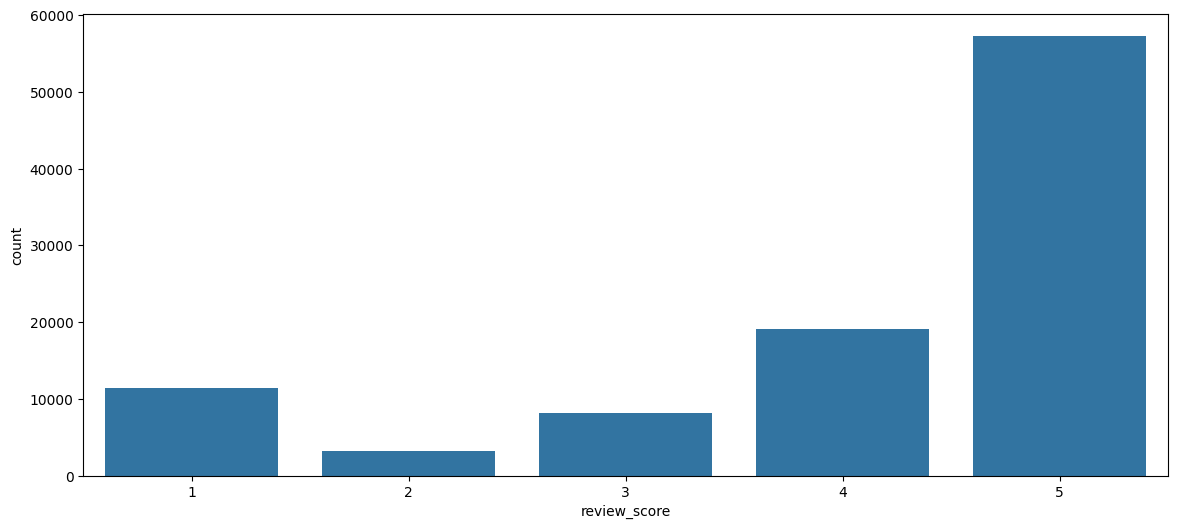

In [42]:
plt.figure(figsize = (14,6))
sns.countplot(x='review_score',data=review)

In [43]:
con=review['review_score'].value_counts().max()
print(con)
average_score = review['review_score'].mean()
print(f"{average_score:.2f}")

57328
4.09


- có 57328 lượt đánh giá 5 sao
- đánh giá trung bình mức 4.09

In [44]:
customer=pd.read_csv("dataset/olist_customers_dataset.csv")
customer

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [45]:
customer[customer.duplicated(['customer_unique_id'], keep=False)]
#customerunique_id trên bộ dữ liệu là để cho phép bạn xác định những khách hàng đã mua lại tại cửa hàng

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR
13,eabebad39a88bb6f5b52376faec28612,295c05e81917928d76245e842748184d,5704,sao paulo,SP
32,2d5831cb2dff7cdefba62e950ae3dc7b,e9dd12dca17352644a959d9dea133935,42800,camacari,BA
33,b2bed119388167a954382cca36c4777f,e079b18794454de9d2be5c12b4392294,27525,resende,RJ
...,...,...,...,...,...
99324,5b46a0d983eec8c97363bea78d4a69dd,8bab3162259edfaadd1ea2e1fe7f58dc,31565,belo horizonte,MG
99327,c1affa46f9f3b514555259049a0307b9,12ab9334b1240d6d037f2b0102a49571,38050,uberaba,MG
99336,ebf46ff530343a129926adc1f831dea4,0ee57f62666561b72f2ceacad0230cbf,9530,sao caetano do sul,SP
99353,282fbce48e4d2077aad602dd125c9225,0ceb502fc33a2ad327b08288c5310e2e,29134,viana,ES


In [46]:
#customer.sort_values('customer_unique_id', inplace=True)
customer.drop_duplicates(subset='customer_unique_id', keep=False, inplace=True)
#customer['customer_unique_id'].duplicated().sum()

<Axes: xlabel='customer_state', ylabel='count'>

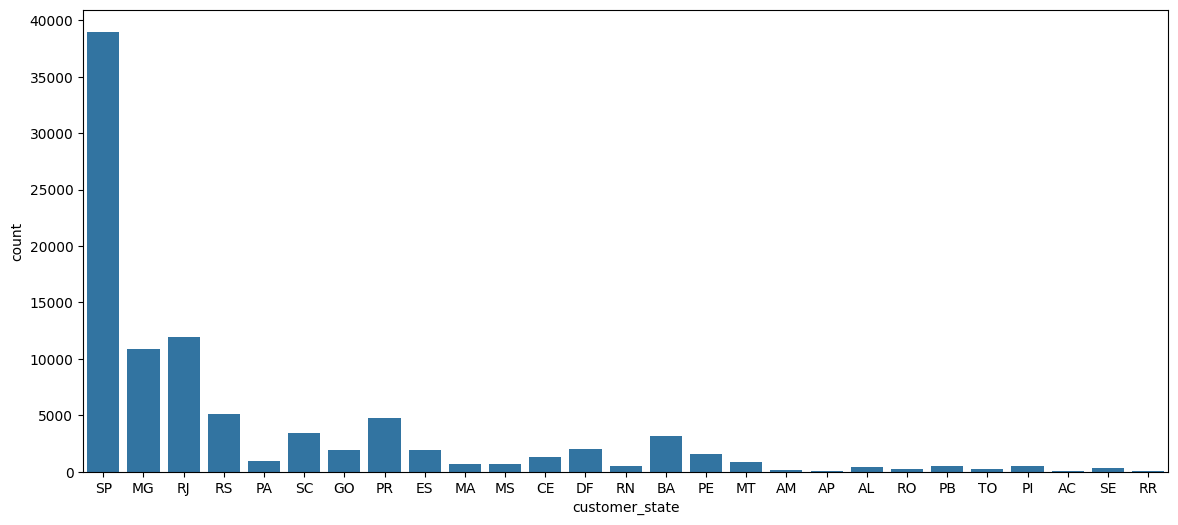

In [47]:
plt.figure(figsize = (14,6))
sns.countplot(x='customer_state',data=customer)

sp là bang có nhiều khách hàng mua hàng nhất 

In [48]:
product_name=pd.read_csv("dataset/product_category_name_translation.csv")
product_name

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [49]:
df=pd.merge(payments,review,how='inner', on='order_id')
df=pd.merge(df,customer,how='inner',on='customer_id')
df=pd.merge(df,product_name,how='inner',on='product_category_name')
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_time,estimate_time,...,review_id,review_score,review_comment_title,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-08-07,2018-08-13,...,8d5266042046a06655c8db133d120ba5,4,Recomended,2018-08-08 00:00:00,2018-08-08 18:37:50,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,perfumery
1,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08-17,2018-09-04,...,e73b67b67587f7644d5bd1a52deb1b01,5,Super recomended,2018-08-18 00:00:00,2018-08-22 19:07:58,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,auto
2,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-12-02,2017-12-15,...,359d03e676b3c069f62cadba8dd3f6e8,5,Super recomended,2017-12-03 00:00:00,2017-12-05 19:21:58,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,pet_shop
3,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02-16,2018-02-26,...,e50934924e227544ba8246aeb3770dd4,5,Super recomended,2018-02-17 00:00:00,2018-02-18 13:02:51,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,stationery
4,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,2017-07-26,2017-08-01,...,89b738e70a1ce346db29a20fb2910161,4,Recomended,2017-07-27 00:00:00,2017-07-27 22:48:30,80bb27c7c16e8f973207a5086ab329e2,86320,congonhinhas,PR,auto


In [50]:
df.drop(columns=['order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date','review_answer_timestamp',
       'order_estimated_delivery_date', 'delayed','shipping_limit_date','payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'seller_zip_code_prefix','customer_zip_code_prefix' ,'delivered_time', 'estimate_time', 'weekly',
       'yearly', 'month', 'diff_days',  'product_id_shorten',  'seller_id_shorten'], inplace=True)

In [51]:
#df.to_csv('dataset/Combined.csv')